In [1]:
import numpy as np
from make_ddf_survey import optimize_ddf_times
from rubin_sim.utils import calcSeason, ddf_locations
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
ddfs = ddf_locations()
data_file='ddf_grid.npz'
ddf_data = np.load(data_file)
ddf_grid = ddf_data['ddf_grid'].copy()



In [3]:
ddf_name = 'ELAISS1'


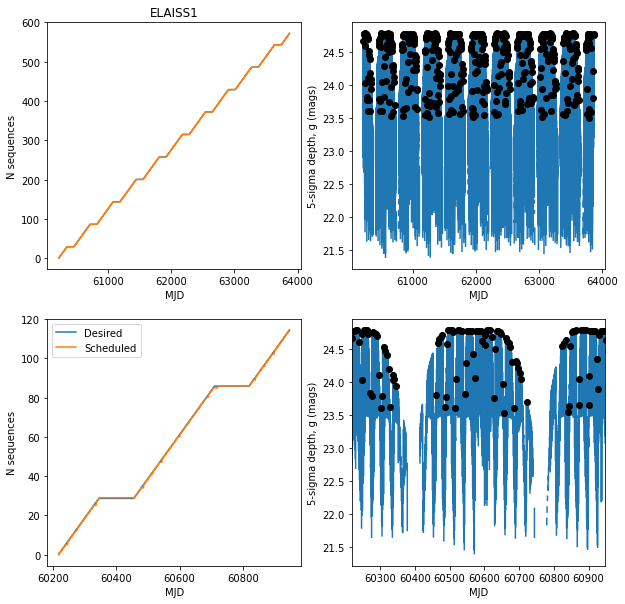

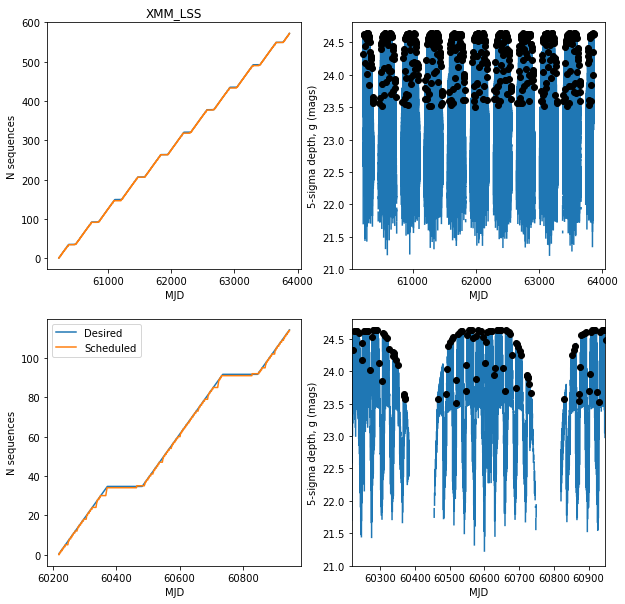

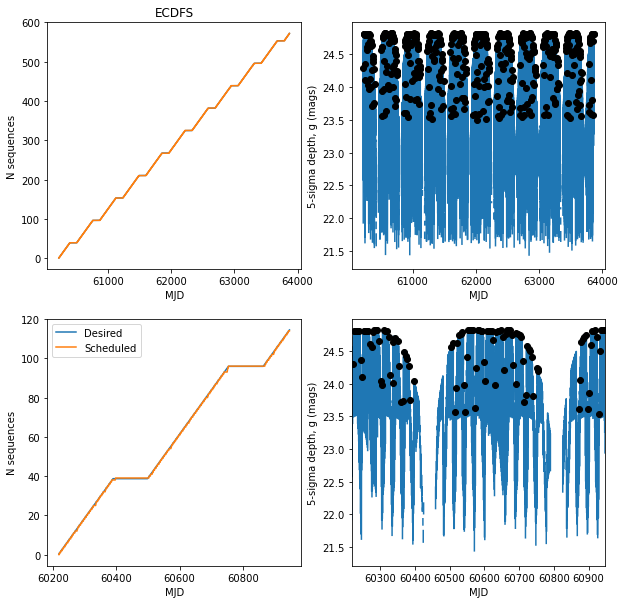

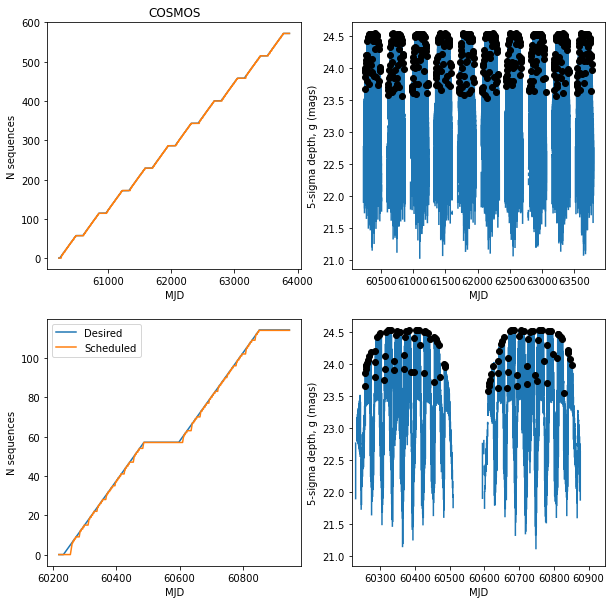

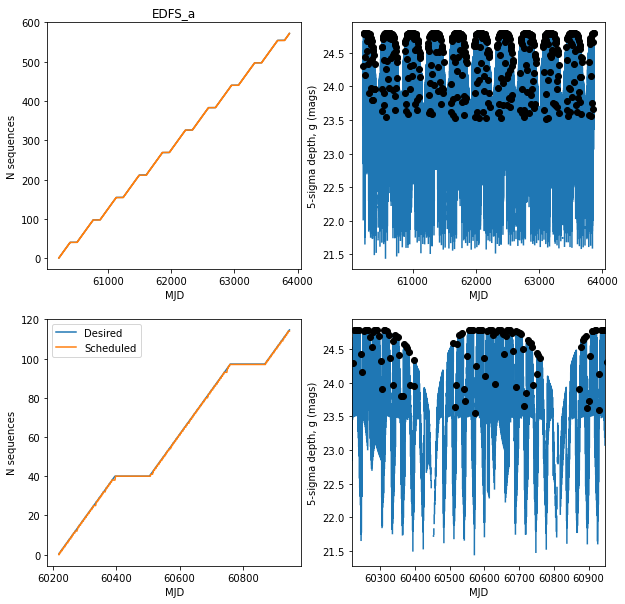

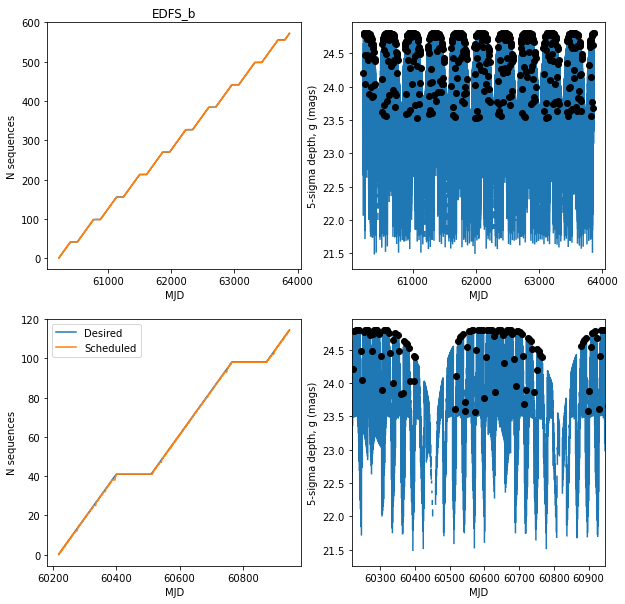

In [10]:
all_mjd_list = []
for ddf_name in ddfs.keys():
    
    ddf_RA = ddfs[ddf_name][0]
    mjds, night_mjd, cumulative_desired, cumulative_sched = optimize_ddf_times(ddf_name, 
                                                                               ddf_RA, 
                                                                               ddf_grid, 
                                                                               sequence_limit=286*2,
                                                                               season_frac=0.15)
    fig, axs = plt.subplots(2,2, figsize=(10,10))

    axs[0,0].plot(night_mjd, cumulative_desired)
    axs[0,0].plot(night_mjd, cumulative_sched)
    axs[0,0].set_title(ddf_name)
    axs[0,0].set_ylabel('N sequences')
    axs[0,0].set_xlabel('MJD')


    axs[0,1].plot(ddf_grid['mjd'], ddf_grid['%s_m5_g' % ddf_name])
    _temp, indx1, indx2 = np.intersect1d(mjds, ddf_grid['mjd'], return_indices=True)
    axs[0,1].plot(mjds, ddf_grid['%s_m5_g' % ddf_name][indx2], 'ko')

    axs[0,1].set_ylabel('5-sigma depth, g (mags)')
    axs[0,1].set_xlabel('MJD')


    good = np.where(night_mjd < (night_mjd.min() +365*2))
    axs[1,0].plot(night_mjd[good], cumulative_desired[good], label='Desired')
    axs[1,0].plot(night_mjd[good], cumulative_sched[good], label='Scheduled')
    axs[1,0].set_ylabel('N sequences')
    axs[1,0].set_xlabel('MJD')
    axs[1,0].legend()

    axs[1,1].plot(ddf_grid['mjd'], ddf_grid['%s_m5_g' % ddf_name])
    axs[1,1].plot(mjds, ddf_grid['%s_m5_g' % ddf_name][indx2], 'ko')
    axs[1,1].set_xlim([ddf_grid['mjd'].min(), ddf_grid['mjd'].min()+365*2])
    axs[1,1].set_ylabel('5-sigma depth, g (mags)')
    axs[1,1].set_xlabel('MJD')
    
    all_mjd_list.append(mjds)

In [5]:
mjds = np.sort(np.array(all_mjd_list).ravel())

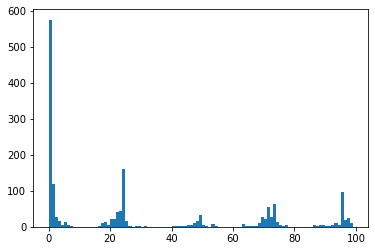

In [6]:
ack = plt.hist(np.diff(mjds)*24, bins=np.arange(0,100, 1))



In [7]:
np.diff(mjds)

array([1.05208333, 0.        , 0.        , ..., 0.07291667, 0.05208333,
       0.01041667])

In [8]:
np.size(np.where(np.diff(mjds) == 0)), np.size(mjds)

(331, 1716)